In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
import warnings

# Ignore all warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_excel('batsmens2222222.xlsx')

In [3]:
df

,Batsmen,Out-by,R,B,M,4s,6s,SR,Team,Against
0,Jonny Bairstow,c Mitchell b Santner,33,35,57,4,1,94.28,England,New Zealand
1,Dawid Malan,c †Latham b Henry,14,24,36,2,0,58.33,England,New Zealand
2,Joe Root,b Phillips,77,86,140,4,1,89.53,England,New Zealand
3,Harry Brook,c Conway b Ravindra,25,16,20,4,1,156.25,England,New Zealand
4,Moeen Ali,b Phillips,11,17,20,1,0,64.70,England,New Zealand
...,...,...,...,...,...,...,...,...,...,...
871,Travis Head,c Shubman Gill b Mohammed Siraj,137,120,166,15,4,114.16,Australia,India
872,Mitchell Marsh,c †Rahul b Bumrah,15,15,15,1,1,100.00,Australia,India
873,Steven Smith,lbw b Bumrah,4,9,11,1,0,44.44,Australia,India
874,Marnus Labuschagne,not out,58,110,133,4,0,52.72,Australia,India


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 876 entries, 0 to 875
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Batsmen  876 non-null    object
 1   Out-by   876 non-null    object
 2   R        876 non-null    object
 3   B        876 non-null    object
 4   M        876 non-null    object
 5   4s       876 non-null    object
 6   6s       876 non-null    object
 7   SR       876 non-null    object
 8   Team     876 non-null    object
 9   Against  876 non-null    object
dtypes: object(10)
memory usage: 68.6+ KB


In [5]:
#handling the incorrect data

df['Batsmen'] = df['Batsmen'].apply(lambda x:x.split("†")[0])
df['Batsmen'] = df['Batsmen'].apply(lambda x:x.replace("(c)",""))

df["R"].replace("-","0",inplace=True)
df["B"].replace("-","0",inplace=True)
df["M"].replace("-","0",inplace=True)
df["4s"].replace("-","0",inplace=True)
df["6s"].replace("-","0",inplace=True)
df["SR"].replace("-","0",inplace=True)

In [6]:
#converting datatype of columns for numeric analysis

df[['R','B','M','4s','6s']] = df[['R','B','M','4s','6s']].astype(int)
df['SR'] = df['SR'].astype(float)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 876 entries, 0 to 875
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Batsmen  876 non-null    object 
 1   Out-by   876 non-null    object 
 2   R        876 non-null    int32  
 3   B        876 non-null    int32  
 4   M        876 non-null    int32  
 5   4s       876 non-null    int32  
 6   6s       876 non-null    int32  
 7   SR       876 non-null    float64
 8   Team     876 non-null    object 
 9   Against  876 non-null    object 
dtypes: float64(1), int32(5), object(4)
memory usage: 51.5+ KB


In [8]:
#removing unwanted spaces in all string columns

df['Batsmen'] = df['Batsmen'].apply(lambda x: x.strip())
df['Out-by'] = df['Out-by'].apply(lambda x: x.strip())
df['Team'] = df['Team'].apply(lambda x: x.strip())
df['Against'] = df['Against'].apply(lambda x: x.strip())

In [9]:
#creating a new column "Boundary Percentage"

def boundary_percentage(x):
    boundary = 4 * x['4s'] + 6 * x['6s']
    
    if x['R'] == 0:
        return 0  # Avoid division by zero
    
    percentage = (boundary / x['R']) * 100
    return percentage

df['Boundary Percentage'] = df.apply(boundary_percentage, axis=1)

In [10]:
df['Bowled-by'] = df['Out-by'].apply(lambda x:x.split(" b ")[len(x.split(" b "))-1])

# Applying Machine Learning Algo's 

**Predicting how many runs a Batsmen scores if he plays a certain number of balls and spends a certain amount of time on the ground** 

In [11]:
#predicting for rohit sharma
rohit_data = df[ df['Batsmen'] == "Rohit Sharma"]
rohit_data

,Batsmen,Out-by,R,B,M,4s,6s,SR,Team,Against,Boundary Percentage,Bowled-by
82,Rohit Sharma,lbw b Hazlewood,0,6,10,0,0,0.00,India,Australia,0.000000,Hazlewood
156,Rohit Sharma,b Rashid Khan,131,84,111,16,5,155.95,India,Afghanistan,71.755725,b Rashid Khan
207,Rohit Sharma,c Iftikhar Ahmed b Shaheen Shah Afridi,86,63,91,6,6,136.50,India,Pakistan,69.767442,Shaheen Shah Afridi
302,Rohit Sharma,c Towhid Hridoy b Hasan Mahmud,48,40,51,7,2,120.00,India,Bangladesh,83.333333,Hasan Mahmud
378,Rohit Sharma,b Ferguson,46,40,44,4,4,115.00,India,New Zealand,86.956522,b Ferguson
518,Rohit Sharma,c Livingstone b Rashid,87,101,162,10,3,86.13,India,England,66.666667,Rashid
588,Rohit Sharma,b Madushanka,4,2,2,1,0,200.00,India,Sri Lanka,100.000000,b Madushanka
657,Rohit Sharma,c Bavuma b Rabada,40,24,32,6,2,166.66,India,South Africa,90.000000,Rabada
805,Rohit Sharma,c Barresi b de Leede,61,54,74,8,2,112.96,India,Netherlands,72.131148,de Leede
822,Rohit Sharma,c Williamson b Southee,47,29,40,4,4,162.06,India,New Zealand,85.106383,Southee


In [12]:
x_rohit = rohit_data.iloc[:,3:5]
x_rohit

,B,M
82,6,10
156,84,111
207,63,91
302,40,51
378,40,44
518,101,162
588,2,2
657,24,32
805,54,74
822,29,40


In [13]:
y_rohit = rohit_data['R']
y_rohit

82       0
156    131
207     86
302     48
378     46
518     87
588      4
657     40
805     61
822     47
859     47
Name: R, dtype: int32

In [14]:
lr_rohit = LinearRegression()
lr_rohit.fit(x_rohit,y_rohit)

LinearRegression()

In [15]:
lr_rohit.predict([[84,111]])

array([115.00026214])

In [16]:
y_rohit_pred = lr_rohit.predict(x_rohit)

In [17]:
print("R2-Score: ",r2_score(y_rohit,y_rohit_pred))
print("MSE: ",mean_squared_error(y_rohit,y_rohit_pred))
print("MAE: ",mean_absolute_error(y_rohit,y_rohit_pred))

R2-Score:  0.9013213816042559
MSE:  124.69552156980215
MAE:  9.958559945565476


In [18]:
#predicting for Virat sharma
virat_data = df[ df['Batsmen'] == "Virat Kohli"]
virat_data

,Batsmen,Out-by,R,B,M,4s,6s,SR,Team,Against,Boundary Percentage,Bowled-by
84,Virat Kohli,c Labuschagne b Hazlewood,85,116,171,6,0,73.27,India,Australia,28.235294,Hazlewood
158,Virat Kohli,not out,55,56,64,6,0,98.21,India,Afghanistan,43.636364,not out
209,Virat Kohli,c Mohammad Nawaz b Hasan Ali,16,18,31,3,0,88.88,India,Pakistan,75.000000,Hasan Ali
304,Virat Kohli,not out,103,97,113,6,4,106.18,India,Bangladesh,46.601942,not out
380,Virat Kohli,c Phillips b Henry,95,104,154,8,2,91.34,India,New Zealand,46.315789,Henry
520,Virat Kohli,c Stokes b Willey,0,9,12,0,0,0.00,India,England,0.000000,Willey
590,Virat Kohli,c Nissanka b Madushanka,88,94,139,11,0,93.61,India,Sri Lanka,50.000000,Madushanka
659,Virat Kohli,not out,101,121,195,10,0,83.47,India,South Africa,39.603960,not out
807,Virat Kohli,b van der Merwe,51,56,69,5,1,91.07,India,Netherlands,50.980392,b van der Merwe
824,Virat Kohli,c Conway b Southee,117,113,149,9,2,103.53,India,New Zealand,41.025641,Southee


In [19]:
x_virat = virat_data.iloc[:,3:5]
y_virat = virat_data['R']

In [20]:
lr_virat = LinearRegression()
lr_virat.fit(x_virat,y_virat)

LinearRegression()

In [21]:
lr_virat.predict([[116,171]])

array([102.93489675])

In [22]:
y_virat_pred = lr_virat.predict(x_virat)

In [23]:
print("R2-Score: ",r2_score(y_virat,y_virat_pred))
print("MSE: ",mean_squared_error(y_virat,y_virat_pred))
print("MAE: ",mean_absolute_error(y_virat,y_virat_pred))

R2-Score:  0.963240754424088
MSE:  47.080998697293694
MAE:  5.3276478368832265


In [24]:
# comparing the scores of both batsmens

print("Virat 84 Balls & 111 Minutes: ",lr_virat.predict([[84,111]]))
print("Rohit 84 Balls & 111 Minutes: ",lr_rohit.predict([[84,111]]))

Virat 84 Balls & 111 Minutes:  [80.20881529]
Rohit 84 Balls & 111 Minutes:  [115.00026214]


# For Entire Players

In [25]:
df.head()

,Batsmen,Out-by,R,B,M,4s,6s,SR,Team,Against,Boundary Percentage,Bowled-by
0,Jonny Bairstow,c Mitchell b Santner,33,35,57,4,1,94.28,England,New Zealand,66.666667,Santner
1,Dawid Malan,c †Latham b Henry,14,24,36,2,0,58.33,England,New Zealand,57.142857,Henry
2,Joe Root,b Phillips,77,86,140,4,1,89.53,England,New Zealand,28.571429,b Phillips
3,Harry Brook,c Conway b Ravindra,25,16,20,4,1,156.25,England,New Zealand,88.000000,Ravindra
4,Moeen Ali,b Phillips,11,17,20,1,0,64.70,England,New Zealand,36.363636,b Phillips


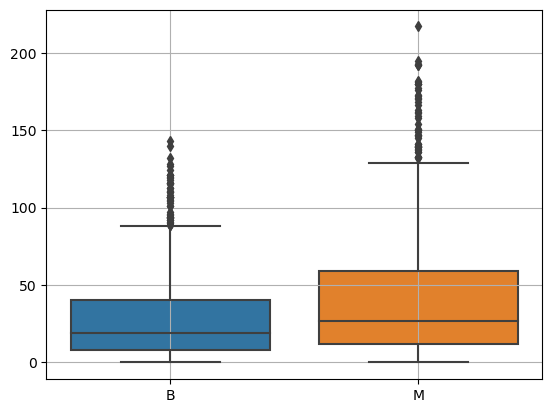

In [26]:
sns.boxplot(df[['B','M']])
plt.grid()
plt.show()

In [27]:
df[['B','M']].describe()

,B,M
count,876.000000,876.000000
mean,29.057078,42.211187
std,28.579736,41.753288
min,0.000000,0.000000
25%,8.000000,11.750000
50%,19.000000,27.000000
75%,40.250000,59.000000
max,143.000000,217.000000


In [28]:
#handling outliers in Balls column

q1 = df['B'].quantile(0.25)
q3 = df['B'].quantile(0.75)
iqr = q3-q1

ul = q3 + 1.5*iqr
ll = q1 - 1.5*iqr

print("Upper Limit: ",ul)
print("Lower Limit: ",ll)

Upper Limit:  88.625
Lower Limit:  -40.375


In [29]:
#handling outliers in Minutes on field column

q1_ = df['M'].quantile(0.25)
q3_ = df['M'].quantile(0.75)
iqr_ = q3_-q1_

ul_ = q3_ + 1.5*iqr_
ll_ = q1_ - 1.5*iqr_

print("Upper Limit: ",ul_)
print("Lower Limit: ",ll_)

Upper Limit:  129.875
Lower Limit:  -59.125


In [30]:
#removing outliers

allteam = df[ (df['B']<ul) & (df['B']>ll) & (df['M']>ll_) & (df['M']<ul) ]     
allteam

,Batsmen,Out-by,R,B,M,4s,6s,SR,Team,Against,Boundary Percentage,Bowled-by
0,Jonny Bairstow,c Mitchell b Santner,33,35,57,4,1,94.28,England,New Zealand,66.666667,Santner
1,Dawid Malan,c †Latham b Henry,14,24,36,2,0,58.33,England,New Zealand,57.142857,Henry
3,Harry Brook,c Conway b Ravindra,25,16,20,4,1,156.25,England,New Zealand,88.000000,Ravindra
4,Moeen Ali,b Phillips,11,17,20,1,0,64.70,England,New Zealand,36.363636,b Phillips
5,Jos Buttler,c †Latham b Henry,43,42,48,2,2,102.38,England,New Zealand,46.511628,Henry
...,...,...,...,...,...,...,...,...,...,...,...,...
869,Mohammed Siraj,not out,9,8,13,1,0,112.50,India,Australia,44.444444,not out
870,David Warner,c Kohli b Mohammed Shami,7,3,6,1,0,233.33,Australia,India,57.142857,Mohammed Shami
872,Mitchell Marsh,c †Rahul b Bumrah,15,15,15,1,1,100.00,Australia,India,66.666667,Bumrah
873,Steven Smith,lbw b Bumrah,4,9,11,1,0,44.44,Australia,India,100.000000,Bumrah


In [31]:
#finding correlation between columns we need

print("Correlation btw Runs and Balls: ",allteam['R'].corr(allteam['B']))
print("Correlation btw Runs and Minutes: ",allteam['R'].corr(allteam['M']))

Correlation btw Runs and Balls:  0.8620435105922515
Correlation btw Runs and Minutes:  0.8452772857305507


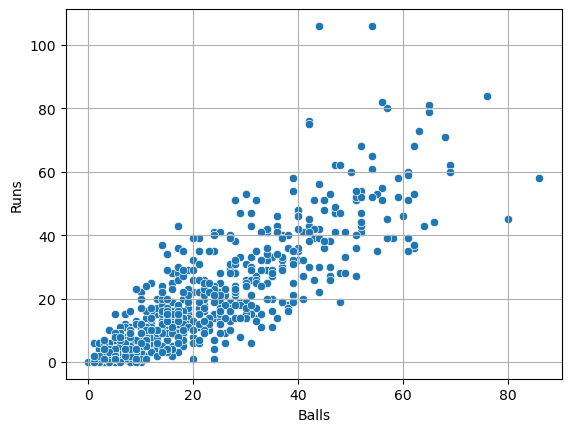

In [32]:
sns.scatterplot(data=allteam, x='B',y='R',palette='tab10')
plt.xlabel("Balls")
plt.ylabel("Runs")
plt.grid()
plt.show()

In [33]:
x = allteam[['B','M']]
y = allteam['R']

In [34]:
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.25,random_state=1)

In [35]:
print("x-train size: ",len(xtrain))
print("x-test size: ",len(xtest))
print("y-train size: ",len(ytrain))
print("y-test size: ",len(ytest))

x-train size:  563
x-test size:  188
y-train size:  563
y-test size:  188


In [36]:
linearreg = LinearRegression()
linearreg.fit(xtrain,ytrain)

LinearRegression()

In [37]:
y_predict = linearreg.predict(xtest)

In [38]:
print("R2-Score: ",r2_score(ytest,y_predict))
print("MAE: ",mean_absolute_error(ytest,y_predict))
print("MSE: ",mean_squared_error(ytest,y_predict))

R2-Score:  0.8011595588164322
MAE:  5.529320268469703
MSE:  59.784295088328726


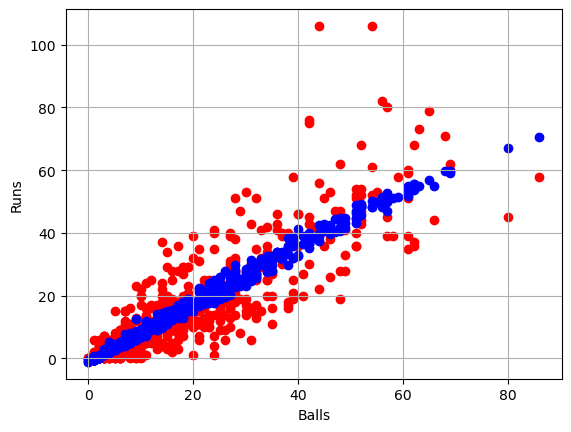

In [39]:
plt.scatter(xtrain['B'],ytrain,color='red')
plt.scatter(xtrain['B'],linearreg.predict(xtrain),color='blue')
plt.xlabel("Balls")
plt.ylabel("Runs")
plt.grid()
plt.show()

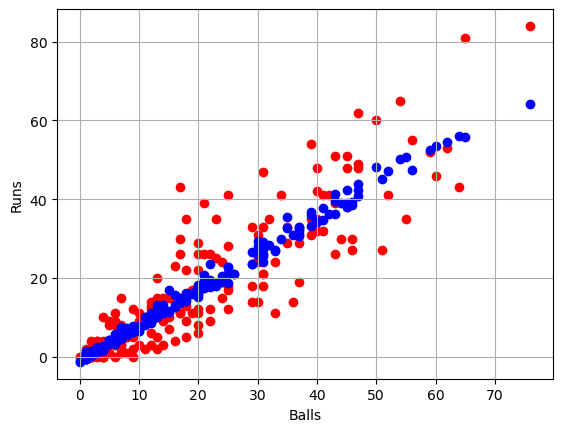

In [40]:
plt.scatter(xtest['B'],ytest,color='red')
plt.scatter(xtest['B'],linearreg.predict(xtest),color='blue')
plt.xlabel("Balls")
plt.ylabel("Runs")
plt.grid()
plt.show()

# Clustering the innings based on Strike Rate

In [44]:
#handling outliers in Balls column

q1 = df['SR'].quantile(0.25)
q3 = df['SR'].quantile(0.75)
iqr = q3-q1

ul = q3 + 1.5*iqr
ll = q1 - 1.5*iqr

print("Upper Limit: ",ul)
print("Lower Limit: ",ll)

Upper Limit:  191.64999999999998
Lower Limit:  -34.989999999999995


In [46]:
SRteam = df[ (df['SR']<ul) & (df['SR']>ll)  ]
SRteam

,Batsmen,Out-by,R,B,M,4s,6s,SR,Team,Against,Boundary Percentage,Bowled-by
0,Jonny Bairstow,c Mitchell b Santner,33,35,57,4,1,94.28,England,New Zealand,66.666667,Santner
1,Dawid Malan,c †Latham b Henry,14,24,36,2,0,58.33,England,New Zealand,57.142857,Henry
2,Joe Root,b Phillips,77,86,140,4,1,89.53,England,New Zealand,28.571429,b Phillips
3,Harry Brook,c Conway b Ravindra,25,16,20,4,1,156.25,England,New Zealand,88.000000,Ravindra
4,Moeen Ali,b Phillips,11,17,20,1,0,64.70,England,New Zealand,36.363636,b Phillips
...,...,...,...,...,...,...,...,...,...,...,...,...
869,Mohammed Siraj,not out,9,8,13,1,0,112.50,India,Australia,44.444444,not out
871,Travis Head,c Shubman Gill b Mohammed Siraj,137,120,166,15,4,114.16,Australia,India,61.313869,Mohammed Siraj
872,Mitchell Marsh,c †Rahul b Bumrah,15,15,15,1,1,100.00,Australia,India,66.666667,Bumrah
873,Steven Smith,lbw b Bumrah,4,9,11,1,0,44.44,Australia,India,100.000000,Bumrah


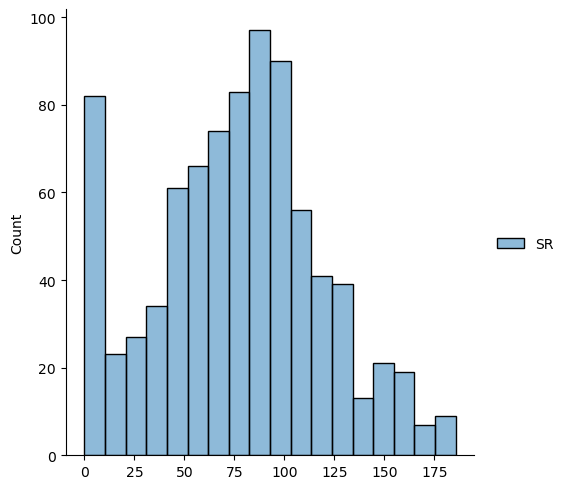

In [57]:
sns.displot(SRteam[['SR']])

<Axes: ylabel='SR'>

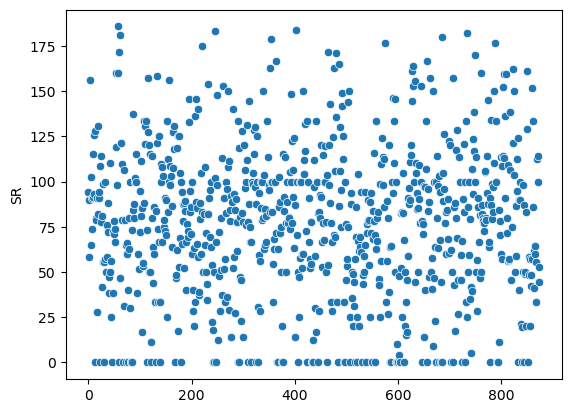

In [58]:
sns.scatterplot(SRteam['SR'])

In [61]:
x = SRteam[['SR']]

In [62]:
wcss = []

for i in range(1,11):
    km = KMeans(n_clusters=i)
    km.fit_predict(x)
    wcss.append(km.inertia_)

In [63]:
wcss

[1518602.5020419247,
 550805.065673393,
 265190.2122873501,
 136927.03255908564,
 86766.55444178896,
 60332.57887535895,
 41877.36592098496,
 32093.646732445075,
 24741.091318035065,
 19539.654219441305]

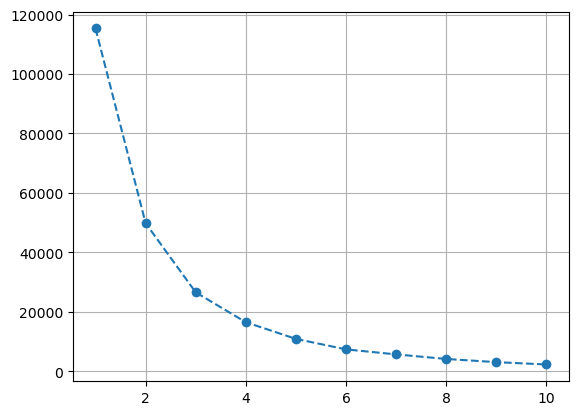

In [105]:
plt.plot(range(1,11),wcss,'o--')
plt.grid()
plt.show()

 **Therefore we can take value of K as 4**

In [88]:
km = KMeans(n_clusters=4)
y_predict = km.fit_predict(x)

In [89]:
SRteam['Cluster'] = y_predict

In [90]:
SRteam

,Batsmen,Out-by,R,B,M,4s,6s,SR,Team,Against,Boundary Percentage,Bowled-by,Cluster
0,Jonny Bairstow,c Mitchell b Santner,33,35,57,4,1,94.28,England,New Zealand,66.666667,Santner,2
1,Dawid Malan,c †Latham b Henry,14,24,36,2,0,58.33,England,New Zealand,57.142857,Henry,1
2,Joe Root,b Phillips,77,86,140,4,1,89.53,England,New Zealand,28.571429,b Phillips,2
3,Harry Brook,c Conway b Ravindra,25,16,20,4,1,156.25,England,New Zealand,88.000000,Ravindra,0
4,Moeen Ali,b Phillips,11,17,20,1,0,64.70,England,New Zealand,36.363636,b Phillips,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
869,Mohammed Siraj,not out,9,8,13,1,0,112.50,India,Australia,44.444444,not out,2
871,Travis Head,c Shubman Gill b Mohammed Siraj,137,120,166,15,4,114.16,Australia,India,61.313869,Mohammed Siraj,2
872,Mitchell Marsh,c †Rahul b Bumrah,15,15,15,1,1,100.00,Australia,India,66.666667,Bumrah,2
873,Steven Smith,lbw b Bumrah,4,9,11,1,0,44.44,Australia,India,100.000000,Bumrah,1


In [91]:
sr1 = SRteam[ SRteam['Cluster'] == 0 ]
sr2 = SRteam[ SRteam['Cluster'] == 1 ]
sr3 = SRteam[ SRteam['Cluster'] == 2 ]
sr4 = SRteam[ SRteam['Cluster'] == 3 ]

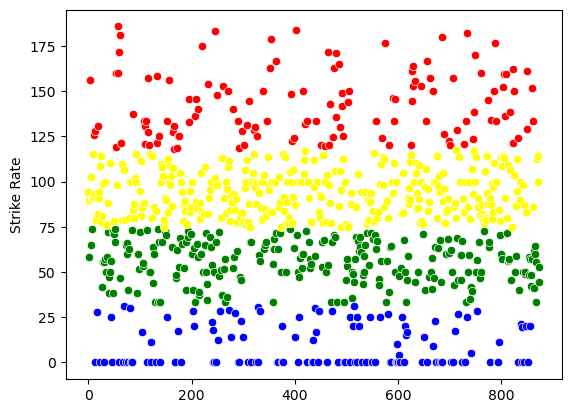

In [92]:
sns.scatterplot(sr1['SR'],color='red')
sns.scatterplot(sr2['SR'],color='green')
sns.scatterplot(sr3['SR'],color='yellow')
sns.scatterplot(sr4['SR'],color='blue')
plt.ylabel("Strike Rate")
plt.show()

In [93]:
SRteam['Cluster'] = SRteam['Cluster'].map({0:"Hitters",1:"Defensive",2:"Partnership Builders",3:"Ducks"})

In [94]:
SRteam['Cluster'].value_counts()

Cluster
Partnership Builders    335
Defensive               243
Ducks                   134
Hitters                 130
Name: count, dtype: int64

# Clustering Each Batsmen into TypeOfBatsmen

In [98]:
df2 = pd.read_excel('AllBatters.xlsx')

In [100]:
df2

,Unnamed: 0,Player,Team,Matches,Innings,NO,Runs,Highest Score,Batting Average,Balls Faced,SR,100,50,0,4s,6s
0,0,V Kohli,IND,11,11,3,765,117,95.62,847,90.31,3,6,1,68,9
1,1,RG Sharma,IND,11,11,0,597,131,54.27,474,125.94,1,3,1,66,31
2,2,Q de Kock,SA,10,10,0,594,174,59.40,555,107.02,4,-,-,57,21
3,3,R Ravindra,NZ,10,10,1,578,123*,64.22,543,106.44,3,2,-,55,17
4,4,DJ Mitchell,NZ,10,9,1,552,134,69.00,497,111.06,2,2,-,48,22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
141,141,MADI Hemantha,SL,2,2,1,4,4*,4.00,4,100.00,-,-,1,1,0
142,142,JR Hazlewood,AUS,11,5,3,4,2,2.00,5,80.00,-,-,1,0,0
143,143,Fazalhaq Farooqi,AFG,6,3,2,2,2*,2.00,9,22.22,-,-,1,0,0
144,144,AT Carey,AUS,1,1,0,-,0,0.00,2,0.00,-,-,1,0,0


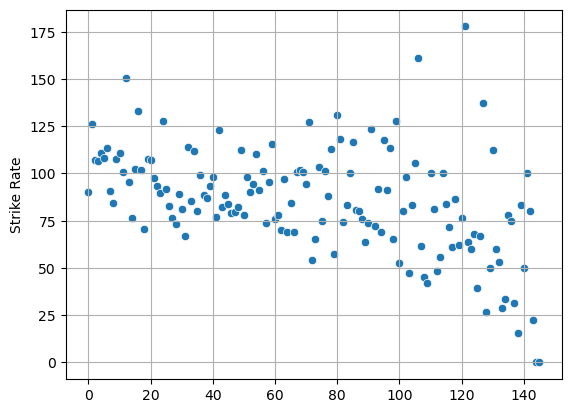

In [110]:
sns.scatterplot(df2['SR'])
plt.ylabel("Strike Rate")
plt.grid()
plt.show()

In [102]:
x = df2[['SR']]

In [117]:
mms = MinMaxScaler()
x = mms.fit_transform(x)

In [120]:
wcss = []

for i in range(1,11):
    km = KMeans(n_clusters=i)
    km.fit_predict(x)
    wcss.append(km.inertia_)

In [121]:
wcss

[3.649068428802847,
 1.5755073200075618,
 0.8397992589342165,
 0.5218246071861127,
 0.3433255011404711,
 0.23360403223612997,
 0.17759700020489624,
 0.1297833902189937,
 0.09790798934522661,
 0.07168405366274946]

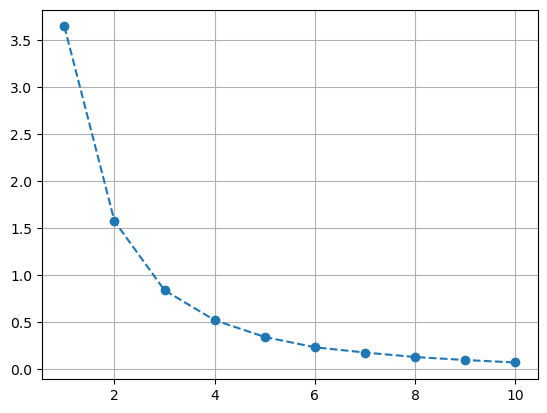

In [122]:
plt.plot(range(1,11),wcss,'o--')
plt.grid()
plt.show()

**From Elbo Method, we can conclude that K=4**

In [147]:
km = KMeans(n_clusters=4)
y_predict = km.fit_predict(x)

In [124]:
df2['TypeOfBatmen'] = y_predict

In [125]:
sr1 = df2[ df2['TypeOfBatmen'] == 0 ]
sr2 = df2[ df2['TypeOfBatmen'] == 1 ]
sr3 = df2[ df2['TypeOfBatmen'] == 2 ]
sr4 = df2[ df2['TypeOfBatmen'] == 3 ]

In [135]:
df2['TypeOfBatmen'] = df2['TypeOfBatmen'].map({0:"Partnership Builder",1:"Defensive",2:"Slow Batters",3:"Hitters"})

In [136]:
df2

,Unnamed: 0,Player,Team,Matches,Innings,NO,Runs,Highest Score,Batting Average,Balls Faced,SR,100,50,0,4s,6s,TypeOfBatmen
0,0,V Kohli,IND,11,11,3,765,117,95.62,847,90.31,3,6,1,68,9,Partnership Builder
1,1,RG Sharma,IND,11,11,0,597,131,54.27,474,125.94,1,3,1,66,31,Hitters
2,2,Q de Kock,SA,10,10,0,594,174,59.40,555,107.02,4,-,-,57,21,Partnership Builder
3,3,R Ravindra,NZ,10,10,1,578,123*,64.22,543,106.44,3,2,-,55,17,Partnership Builder
4,4,DJ Mitchell,NZ,10,9,1,552,134,69.00,497,111.06,2,2,-,48,22,Partnership Builder
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
141,141,MADI Hemantha,SL,2,2,1,4,4*,4.00,4,100.00,-,-,1,1,0,Partnership Builder
142,142,JR Hazlewood,AUS,11,5,3,4,2,2.00,5,80.00,-,-,1,0,0,Slow Batters
143,143,Fazalhaq Farooqi,AFG,6,3,2,2,2*,2.00,9,22.22,-,-,1,0,0,Defensive
144,144,AT Carey,AUS,1,1,0,-,0,0.00,2,0.00,-,-,1,0,0,Defensive


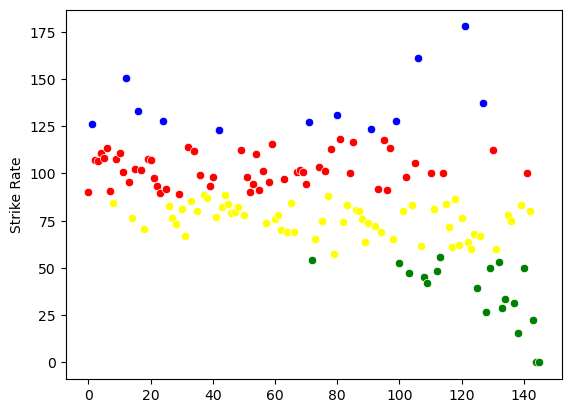

In [126]:
sns.scatterplot(sr1['SR'],color='red')
sns.scatterplot(sr2['SR'],color='green')
sns.scatterplot(sr3['SR'],color='yellow')
sns.scatterplot(sr4['SR'],color='blue')
plt.ylabel("Strike Rate")
plt.show()

# Clustering Each Bowlers into TypeOfBowlers

In [245]:
bowlers = pd.read_excel('AllBowlers.xlsx')

In [246]:
bowlers.head()

,Unnamed: 0,Player,Team,Matches,Innings,Balls,Overs,Maidens,Runs,Wickets,Best,Average,Economy,SR,4,5
0,0,Mohammed Shami,IND,7,7,293,48.5,4,257,24,7/57,10.70,5.26,12.20,1,3
1,1,A Zampa,AUS,11,11,576,96.0,1,515,23,4/8,22.39,5.36,25.04,3,-
2,2,D Madushanka,SL,9,9,470,78.2,4,525,21,5/80,25.00,6.70,22.38,1,1
3,3,JJ Bumrah,IND,11,11,551,91.5,9,373,20,4/39,18.65,4.06,27.55,1,-
4,4,G Coetzee,SA,8,8,381,63.3,1,396,20,4/44,19.80,6.23,19.05,1,-


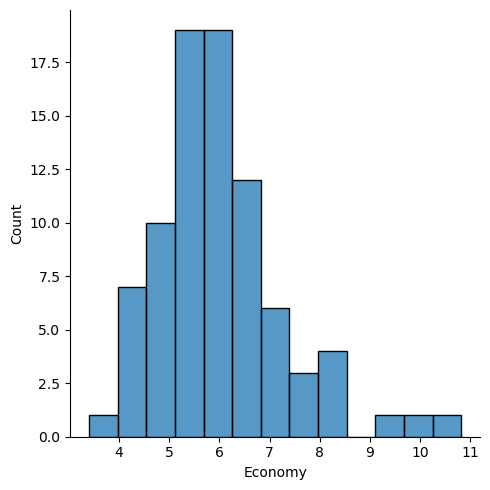

In [247]:
sns.displot(bowlers['Economy'])
plt.show()

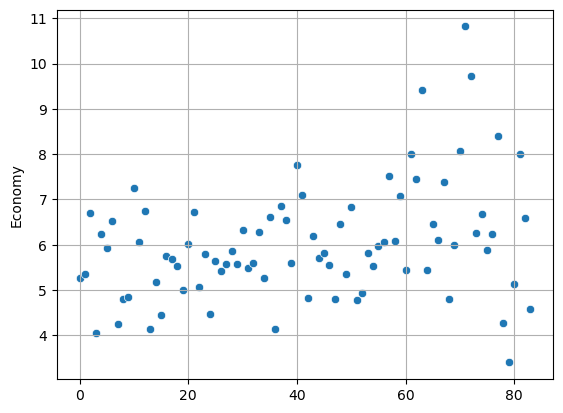

In [248]:
sns.scatterplot(bowlers['Economy'])
plt.grid()
plt.show()

In [249]:
x = bowlers[['Economy','Wickets']]

In [250]:
wcss = []

for i in range(1,11):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit_predict(x)
    wcss.append(kmeans.inertia_)

In [251]:
wcss

[3052.035314285714,
 937.1927961538463,
 478.8657653100142,
 335.60767831932776,
 209.25033872670807,
 158.01307404761906,
 130.2508736964205,
 113.36333626984128,
 101.18018960317463,
 90.09685357142858]

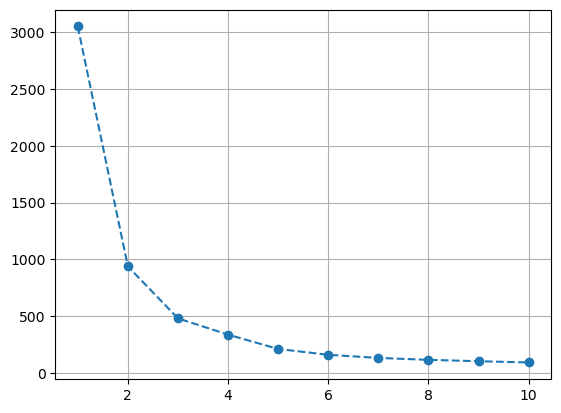

In [252]:
plt.plot(range(1,11),wcss,'o--')
plt.grid()
plt.show()

In [253]:
kmeans = KMeans(n_clusters=4)
y_prediction = kmeans.fit_predict(x)

In [254]:
bowlers['TypeOfBowler'] = y_prediction

In [255]:
bowl1 = bowlers[ bowlers['TypeOfBowler'] == 0 ]
bowl2 = bowlers[ bowlers['TypeOfBowler'] == 1 ]
bowl3 = bowlers[ bowlers['TypeOfBowler'] == 2 ]
bowl4 = bowlers[ bowlers['TypeOfBowler'] == 3 ]

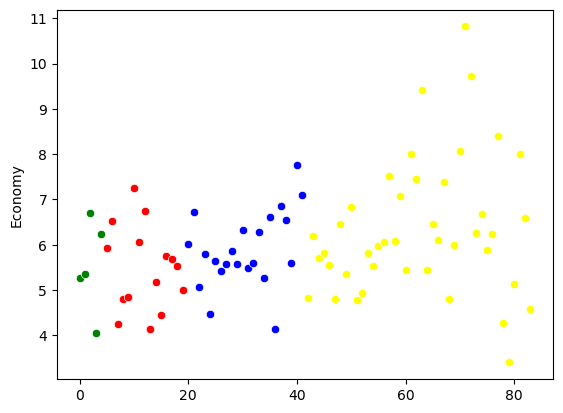

In [258]:
sns.scatterplot(bowl1['Economy'],color='red')
sns.scatterplot(bowl2['Economy'],color='yellow')
sns.scatterplot(bowl3['Economy'],color='blue')
sns.scatterplot(bowl4['Economy'],color='green')
plt.show()

In [268]:
'''
Eco-Wicket: They are economical and take good amount of wickets
Non-Eco: take less wicket with high economy
Economy: They take avg wicket with avg econompy
Wicket-Takers: take maximum wickets with less economy
'''
bowlers['TypeOfBowler'] = bowlers['TypeOfBowler'].map({0:"Eco-Wicket",1:"Non-Eco",2:"Economy",3:"Wicket-Takers"})

In [269]:
bowlers

,Unnamed: 0,Player,Team,Matches,Innings,Balls,Overs,Maidens,Runs,Wickets,Best,Average,Economy,SR,4,5,TypeOfBowler
0,0,Mohammed Shami,IND,7,7,293,48.5,4,257,24,7/57,10.70,5.26,12.20,1,3,Wicket-Takers
1,1,A Zampa,AUS,11,11,576,96.0,1,515,23,4/8,22.39,5.36,25.04,3,-,Wicket-Takers
2,2,D Madushanka,SL,9,9,470,78.2,4,525,21,5/80,25.00,6.70,22.38,1,1,Wicket-Takers
3,3,JJ Bumrah,IND,11,11,551,91.5,9,373,20,4/39,18.65,4.06,27.55,1,-,Wicket-Takers
4,4,G Coetzee,SA,8,8,381,63.3,1,396,20,4/44,19.80,6.23,19.05,1,-,Wicket-Takers
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79,79,R Ashwin,IND,1,1,60,10.0,1,34,1,1/34,34.00,3.40,60.00,-,-,Non-Eco
80,80,AL Phehlukwayo,SA,1,1,42,7.0,-,36,1,1/36,36.00,5.14,42.00,-,-,Non-Eco
81,81,Saqib Zulfiqar,NED,2,2,30,5.0,-,40,1,1/25,40.00,8.00,30.00,-,-,Non-Eco
82,82,JE Root,ENG,9,2,61,10.1,-,67,1,1/19,67.00,6.59,61.00,-,-,Non-Eco
